(glossary:spherical_harmonics:code)=
# Spherical harmonics

This notebook demonstrates how to use a set of spherical harmonics functions from [pyshtools](https://shtools.github.io/SHTOOLS/index.html) to approximate pointclouds in 3D.

In [1]:
import napari_stress
import vedo
import napari
import matplotlib.pyplot as plt

Let's create some sample surface data which we would like to approximate with a spherical harmonics expansion (SHE), for instance an ellipsoid:

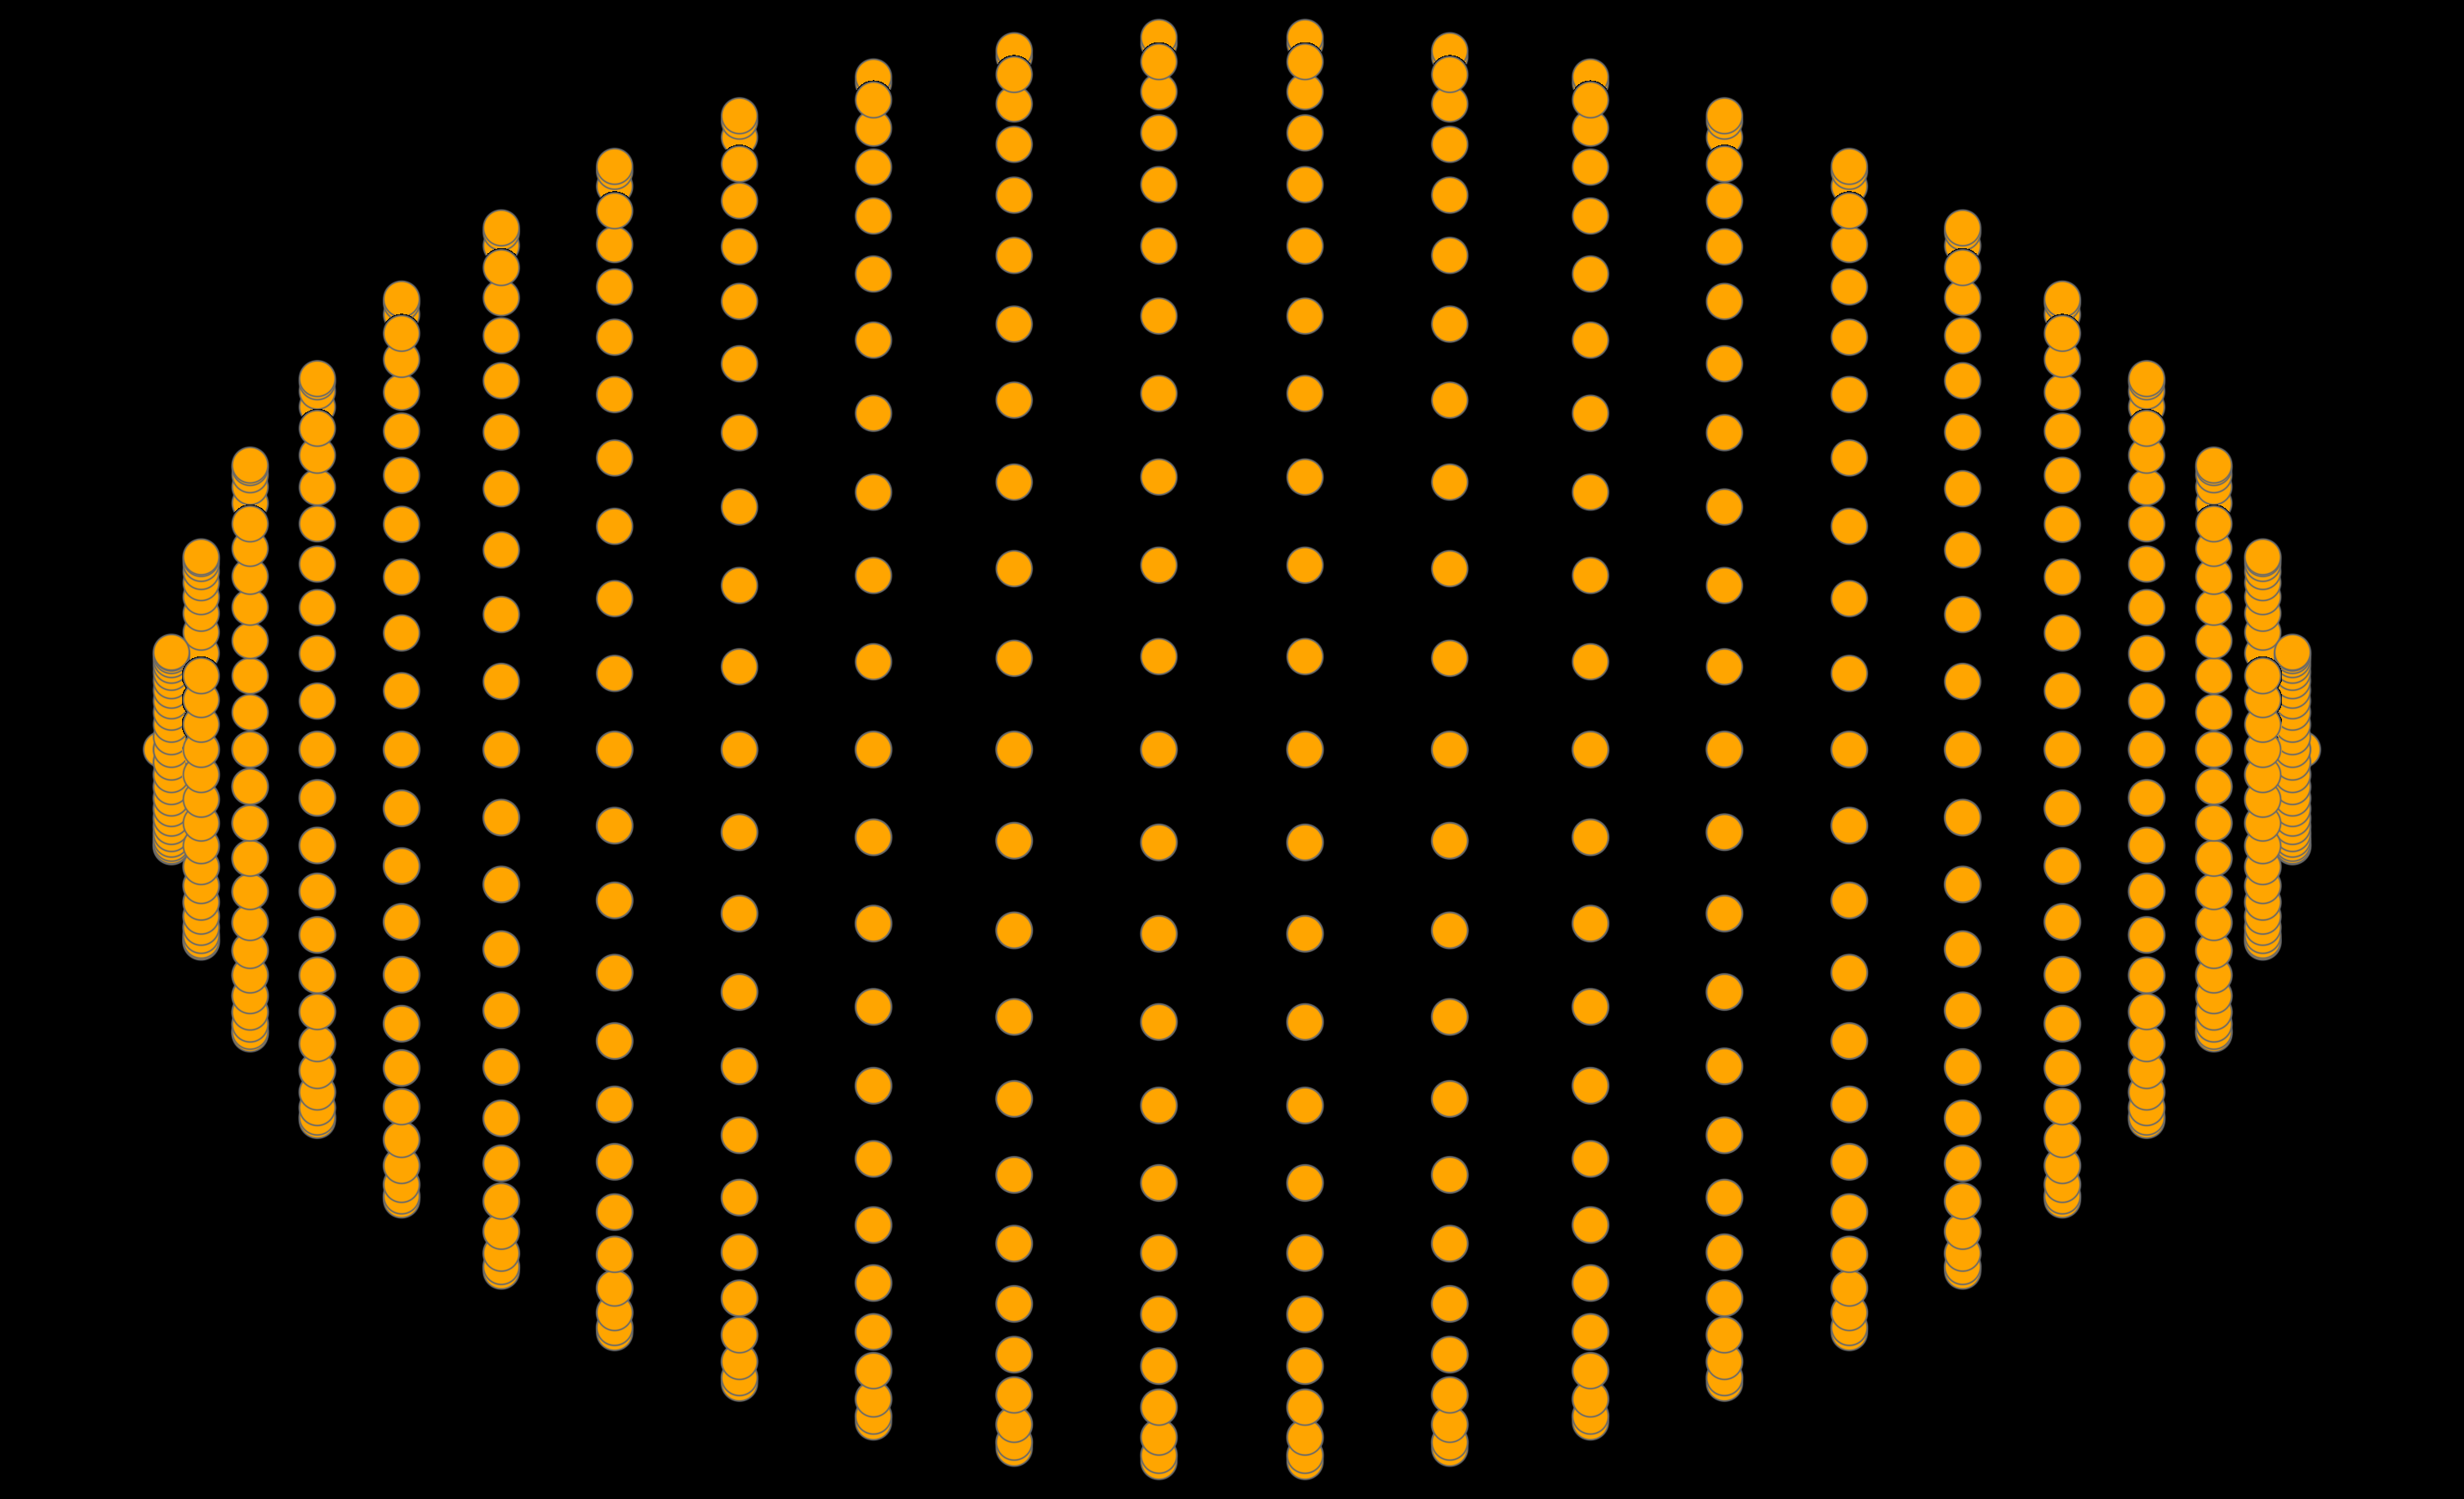

In [2]:
data = vedo.shapes.Ellipsoid()
viewer = napari.Viewer(ndisplay=3)
viewer.add_points(data.points(), size=0.05, face_color='orange', name='Raw')
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Expansion

Now we use the `napari_stress.fit_spherical_harmonics()` function to approximate this pointcloud. The important parameter is the `max_degree` parameter. Higher values for this parameter will tell the function to include spherical harmonic functions of higher orders to approximate the pointcloud and arrive at a better estimation.

You'll see that the approximation of the ellipsoid becomes better with higher order.

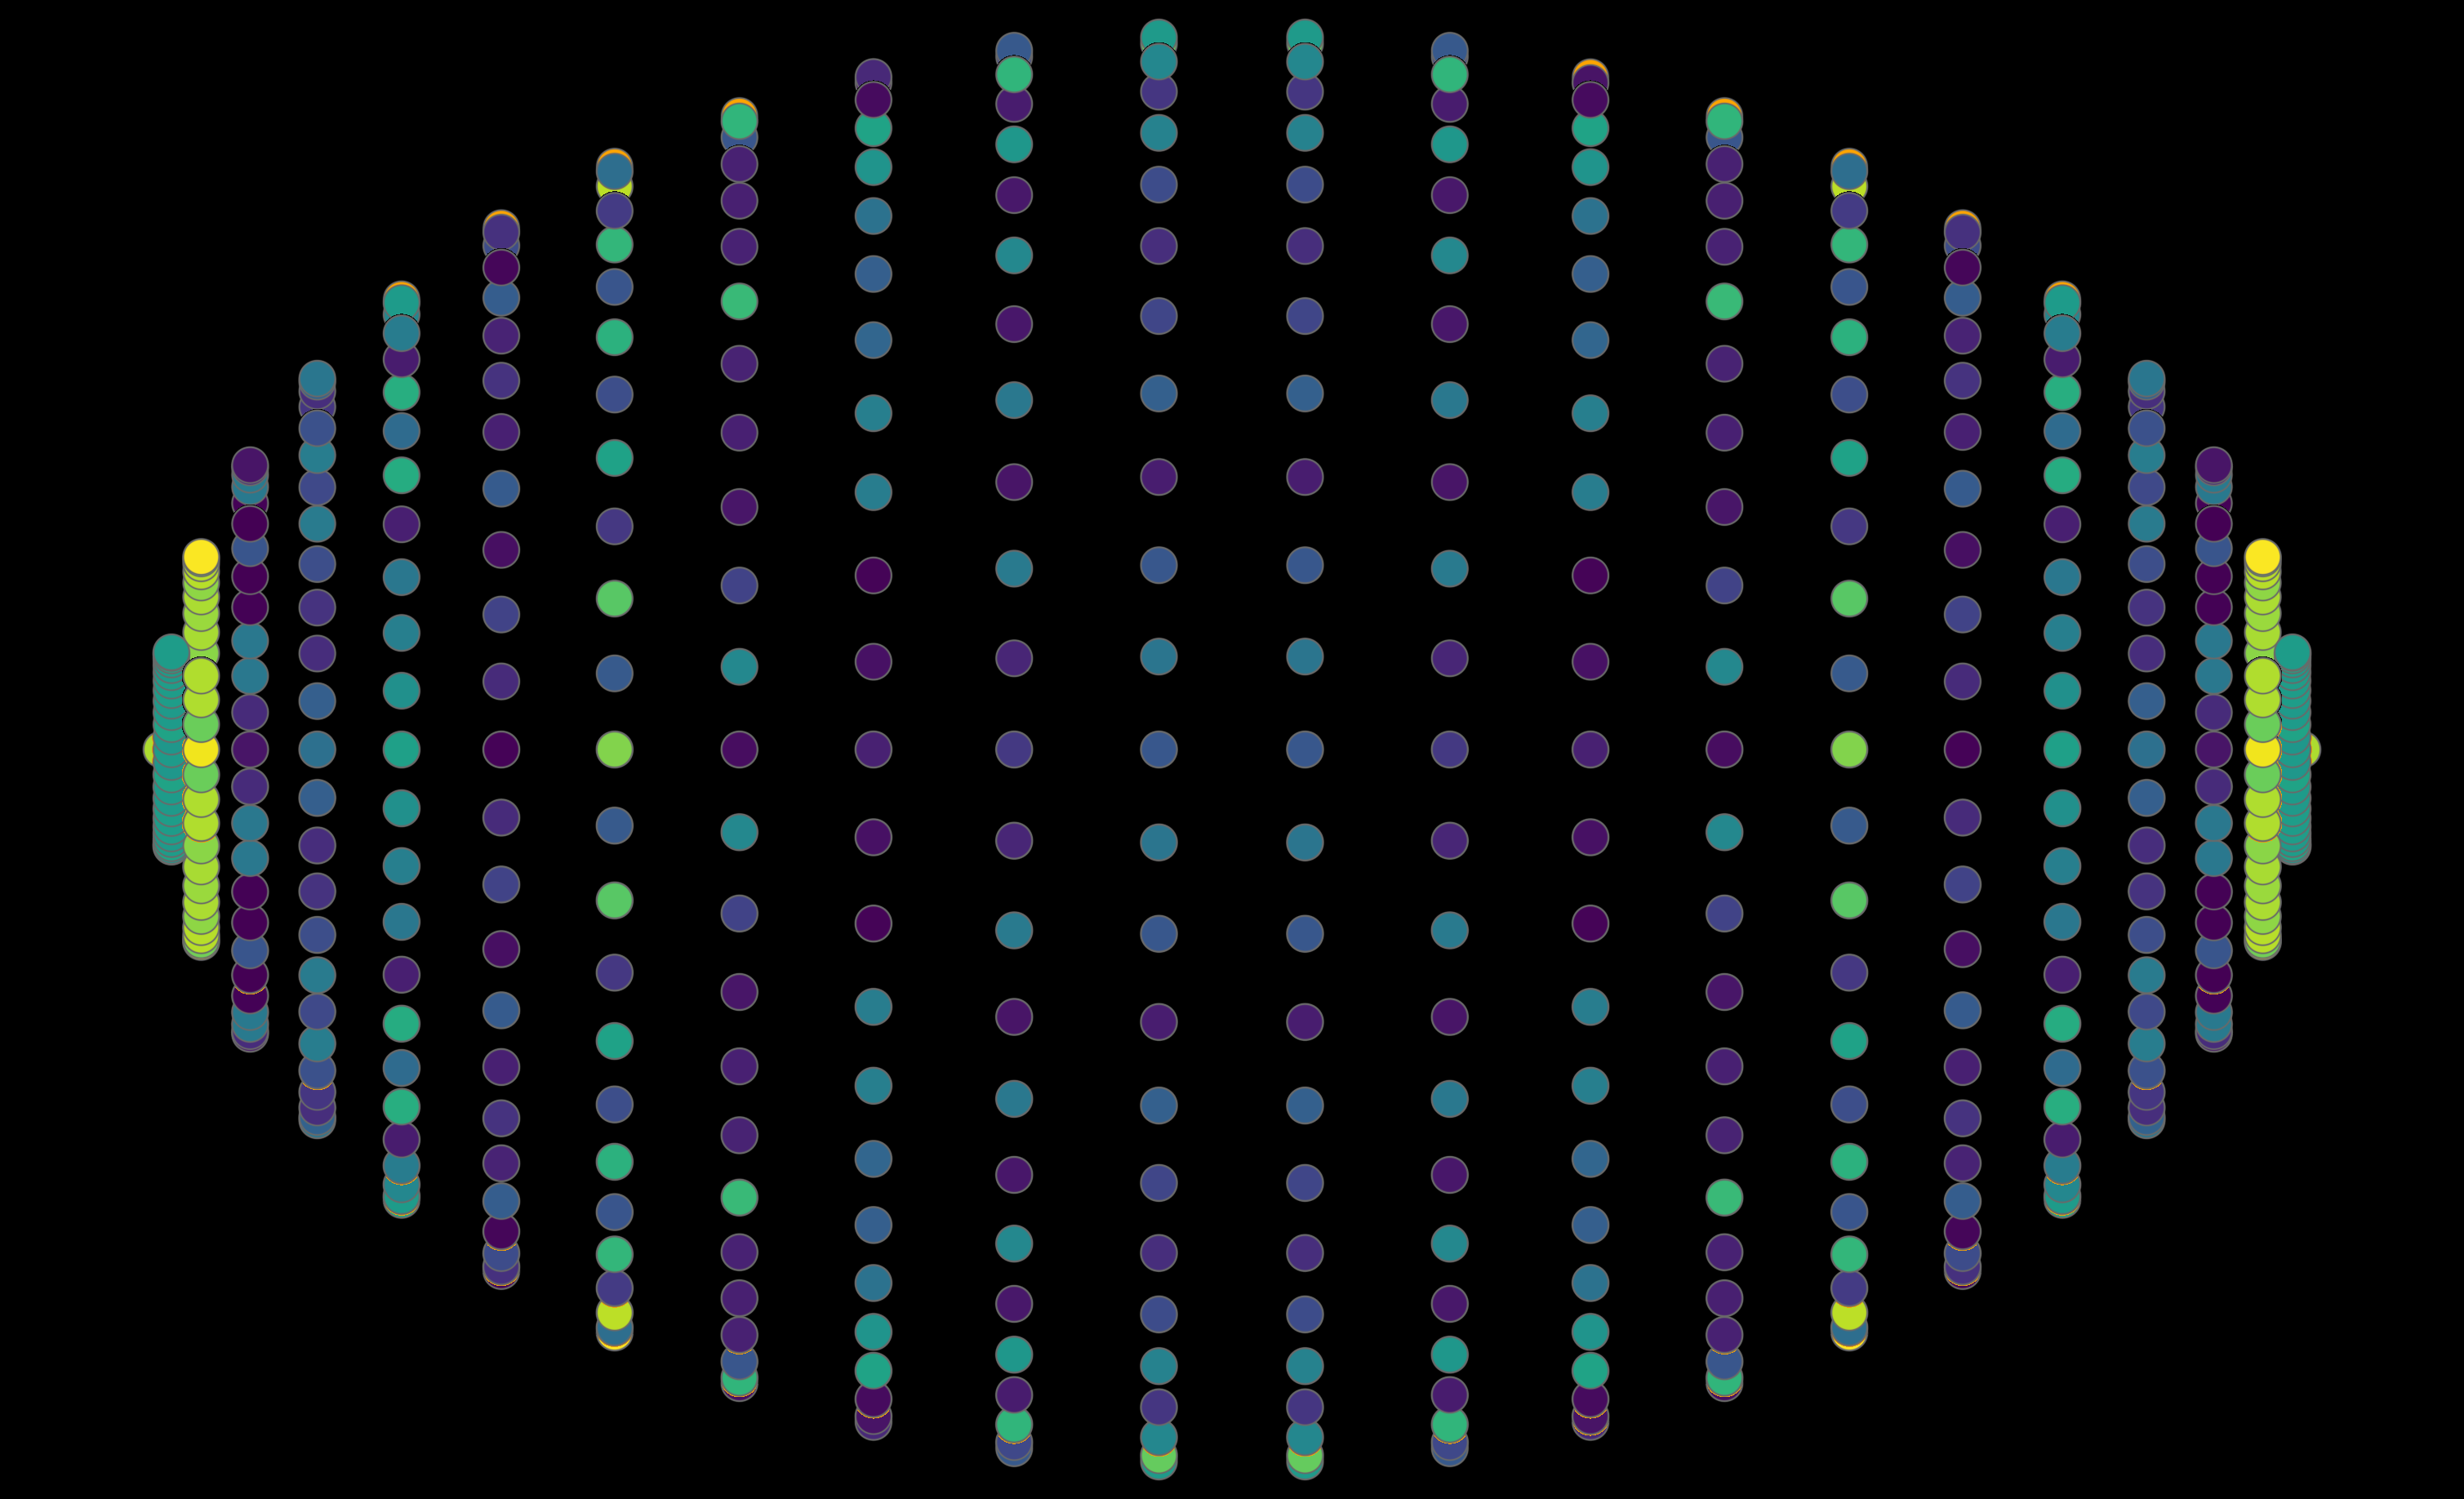

In [3]:
fitted_points = napari_stress.fit_spherical_harmonics(data.points(), max_degree=5)
fitted_points[1]['size'] = 0.05
viewer.add_points(fitted_points[0], **fitted_points[1])
napari.utils.nbscreenshot(viewer, canvas_only=True)

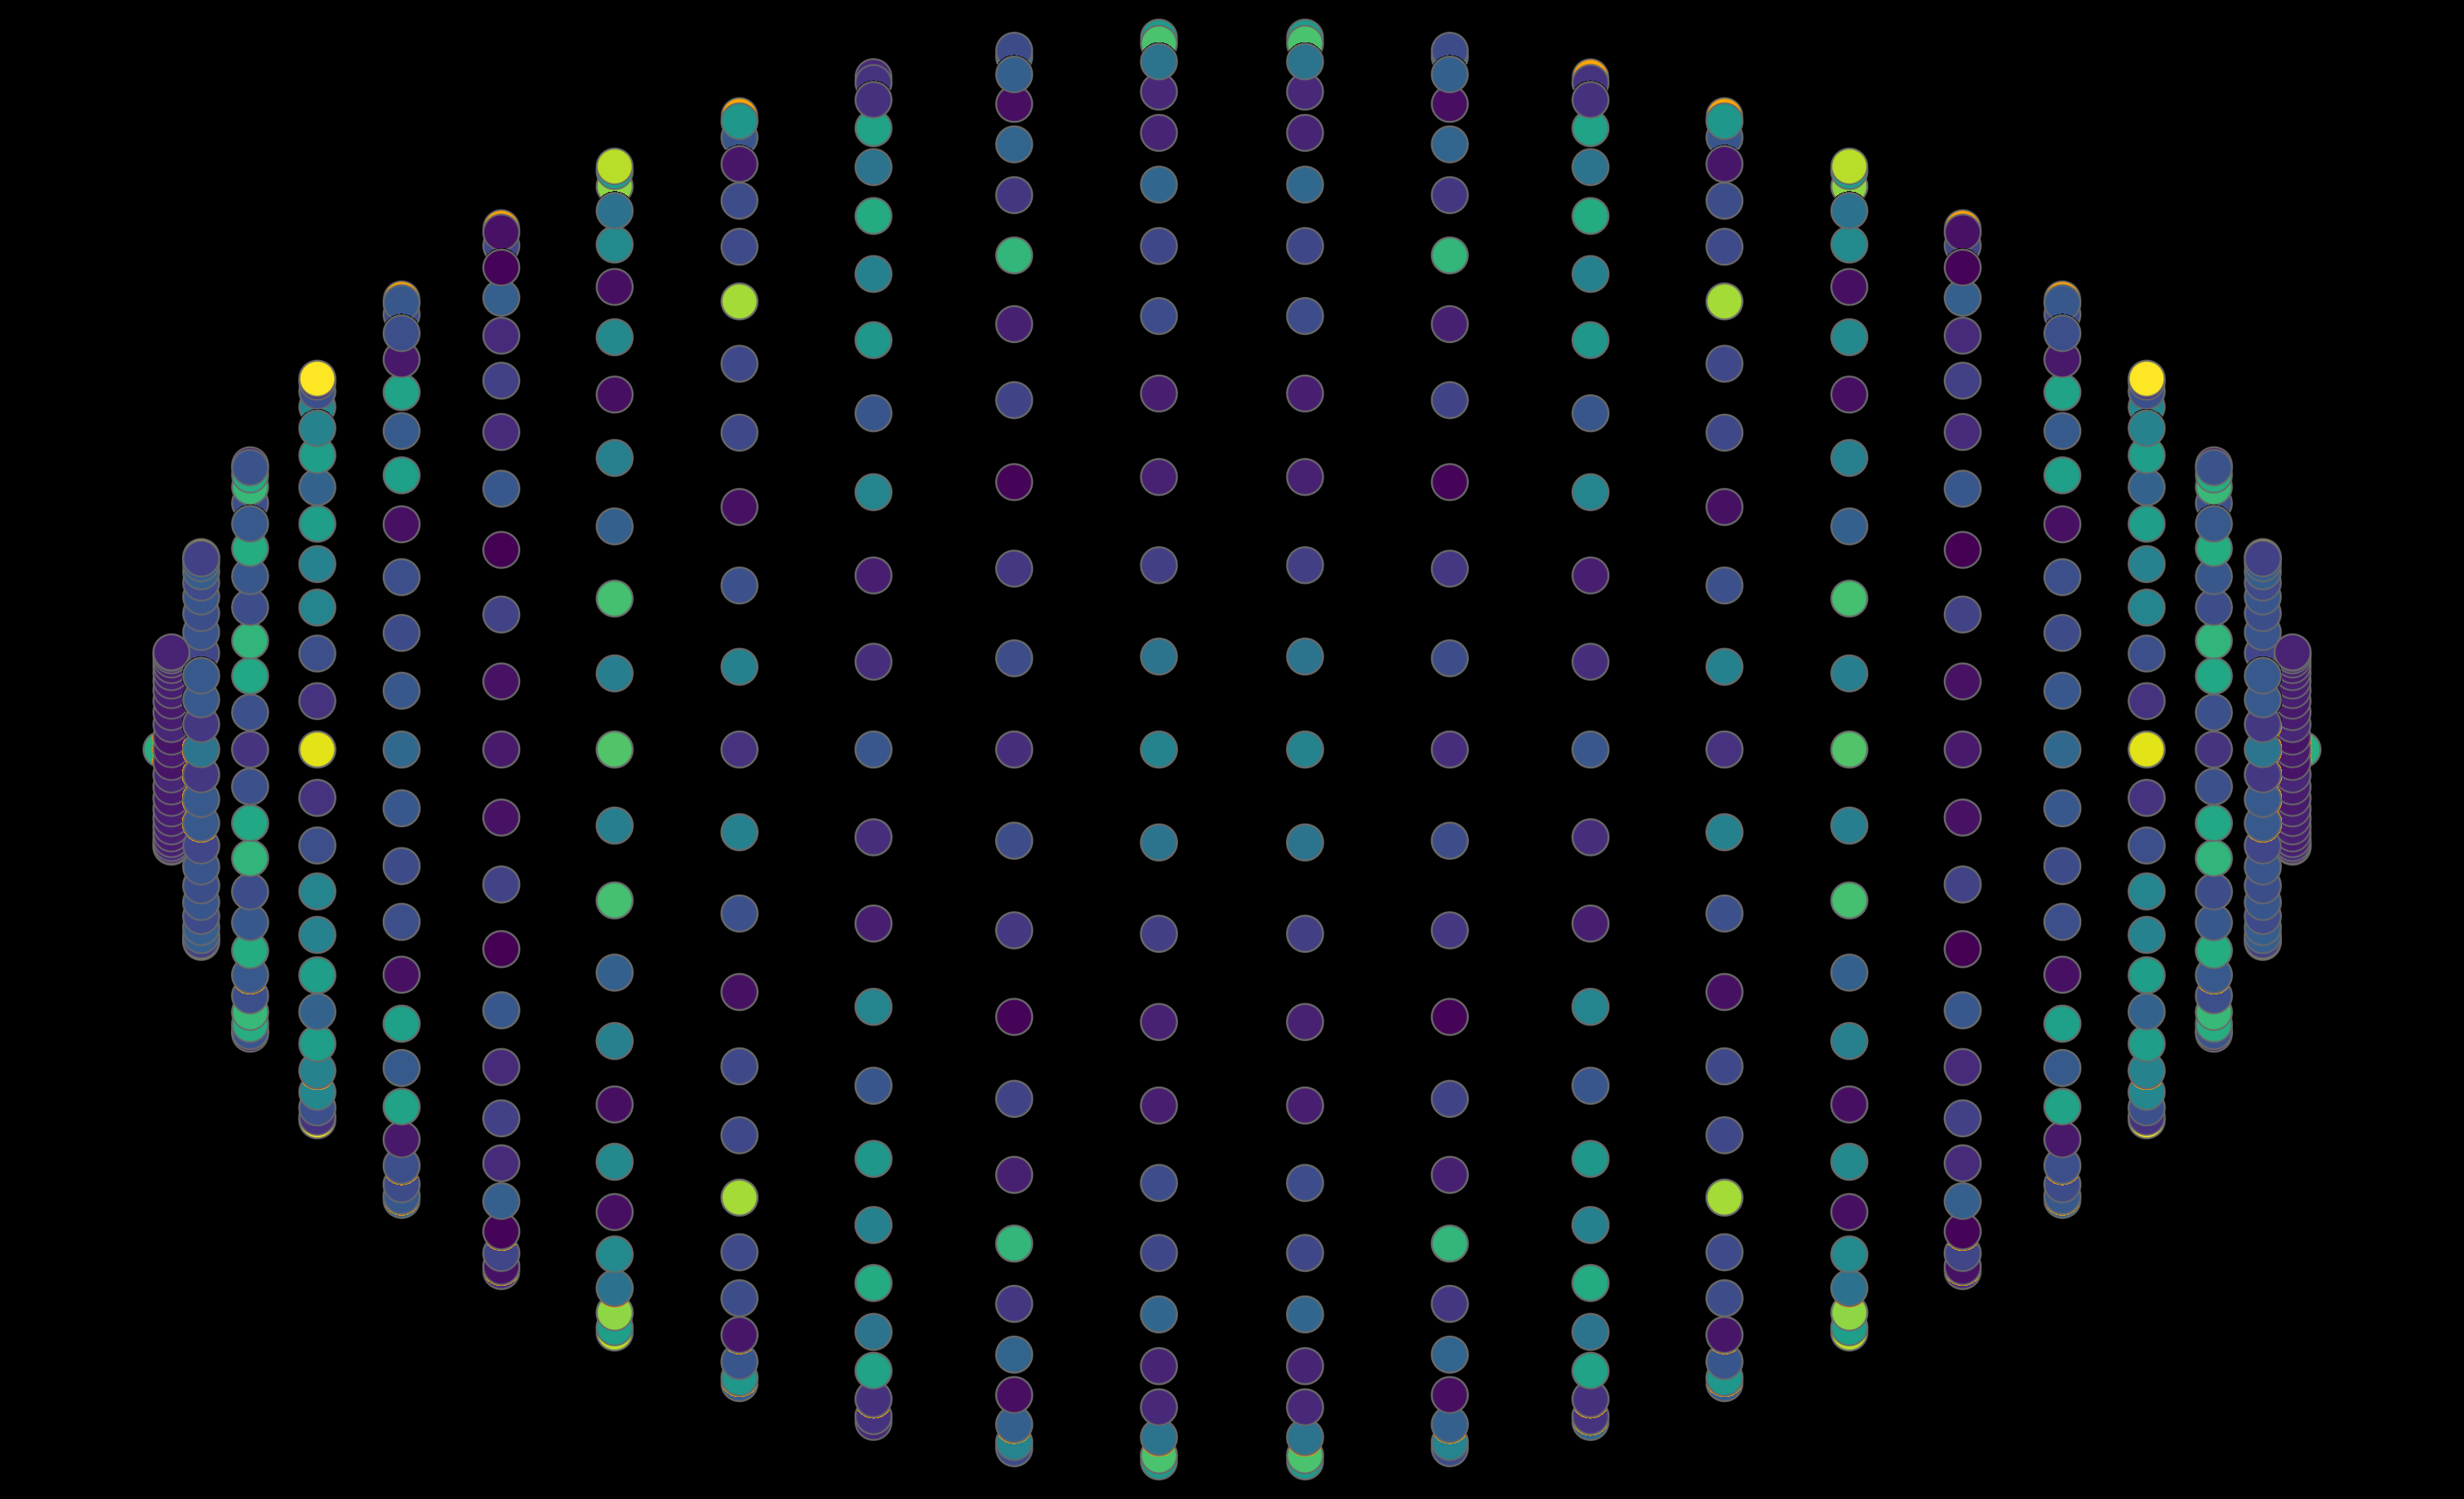

In [4]:
fitted_points = napari_stress.fit_spherical_harmonics(data.points(), max_degree=15)
fitted_points[1]['size'] = 0.05
viewer.add_points(fitted_points[0], **fitted_points[1])
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Quantification

You may have noticed that the data that is returned by the `fit_spherical_harmonics()` function returns more than simply the fitted pointcloud, but a number of additional features, among which are some interesting data, most notably the fit residues and the coefficients of the sperical harmonics function:

In [5]:
fitted_points[1]['features'].keys()

dict_keys(['error'])

In [6]:
fitted_points[1]['metadata'].keys()

dict_keys(['spherical_harmonics_coefficients', 'spherical_harmonics_implementation'])

As for the error, this is encoded in the colorscale of the points in the viewer screenshots above and shows the euclidian distance between the approximated point and the respective input point. We could plot the fit residues as a histogram:

Text(0, 0.5, 'Occurences')

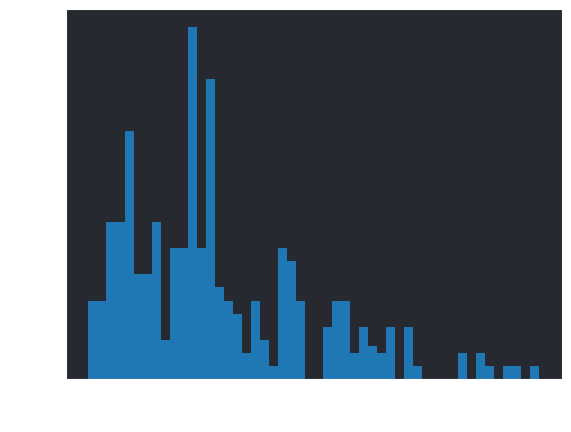

In [7]:
hist = plt.hist(fitted_points[1]['features']['error'], 50)
plt.xlabel('Fit residues')
plt.ylabel('Occurences')

As for the coefficients, this is a bit more complicated. 

**Mathematical background**: A spherical harmonics approximation (a.k.a. [*expansion*](https://en.wikipedia.org/wiki/Spherical_harmonics#Spherical_harmonics_expansion)) $f(\theta,\phi)$ can be written as a superposition of multiple single spherical harmonics functions $Y_l^m(\theta\phi)$ of different degree and order:

$f(\theta,\phi) = \sum_{l=0}^{\infty} \sum_{m=-l}^{l} f_l^m Y_l^m(\theta\phi)$

whereas the coefficients $f_l^m$ determmine how much contribution of which degree and order is neede to achieve the best approximation of the input pointcloud. Currently, napari-stress performs the sperhical harmonics expansion separately for the $x$, $y$ and $z$ direction, hence you'll receive three distinct shape spectra:

In [8]:
fitted_points[1]['metadata']['spherical_harmonics_coefficients'].shape

(3, 16, 16)

Text(0.5, 1.0, 'Z')

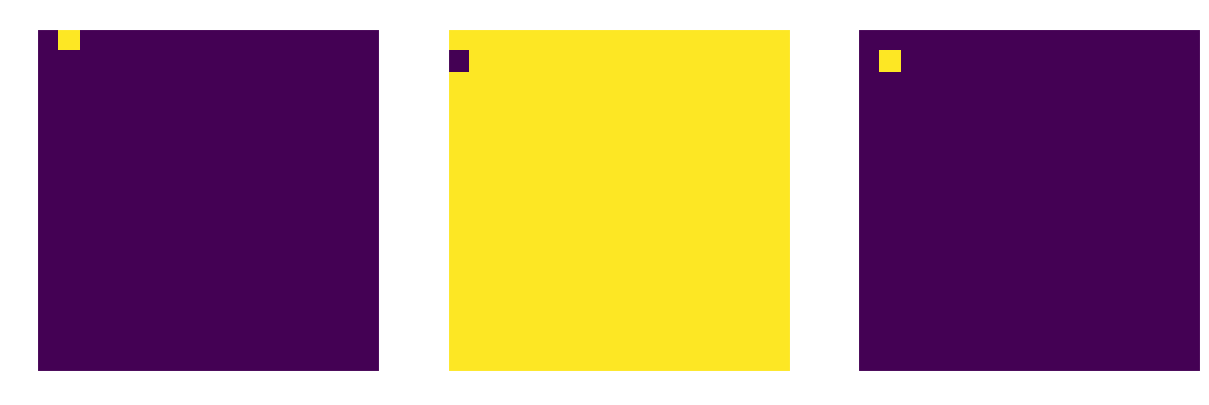

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
axes[0].imshow(fitted_points[1]['metadata']['spherical_harmonics_coefficients'][0])
axes[1].imshow(fitted_points[1]['metadata']['spherical_harmonics_coefficients'][1])
axes[2].imshow(fitted_points[1]['metadata']['spherical_harmonics_coefficients'][2])

axes[0].set_title('X')
axes[1].set_title('Y')
axes[2].set_title('Z')